In [5]:
import matplotlib.pyplot as plt
import cv2
import os
from glob import glob
from tqdm import tqdm
import numpy as np

h_img_path = './data/train_imgs/BC_01_0215.png'
w_img_path = './data/train_imgs/BC_01_1207.png'

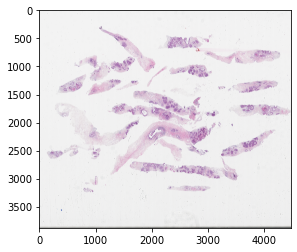

In [7]:
h_img = cv2.imread(h_img_path)
h_img = cv2.cvtColor(h_img, cv2.COLOR_BGR2RGB)
plt.imshow(h_img)

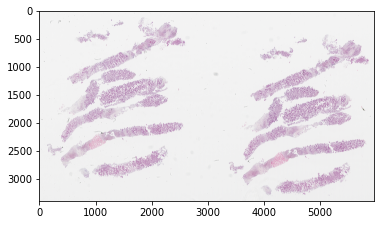

In [8]:
w_img = cv2.imread(w_img_path)
w_img = cv2.cvtColor(w_img, cv2.COLOR_BGR2RGB)
plt.imshow(w_img)

In [52]:
w_ratio = int(w_img_w / 16)
h_ratio = int(w_img_h / 8)
img_stack = []
for w in range(16) :
    for h in range(8) :
        print(w_img[h * h_ratio : (h+1) * h_ratio, w * w_ratio : (w+1) * w_ratio].transpose(2,0,1).shape)


(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 423, 373)
(3, 42

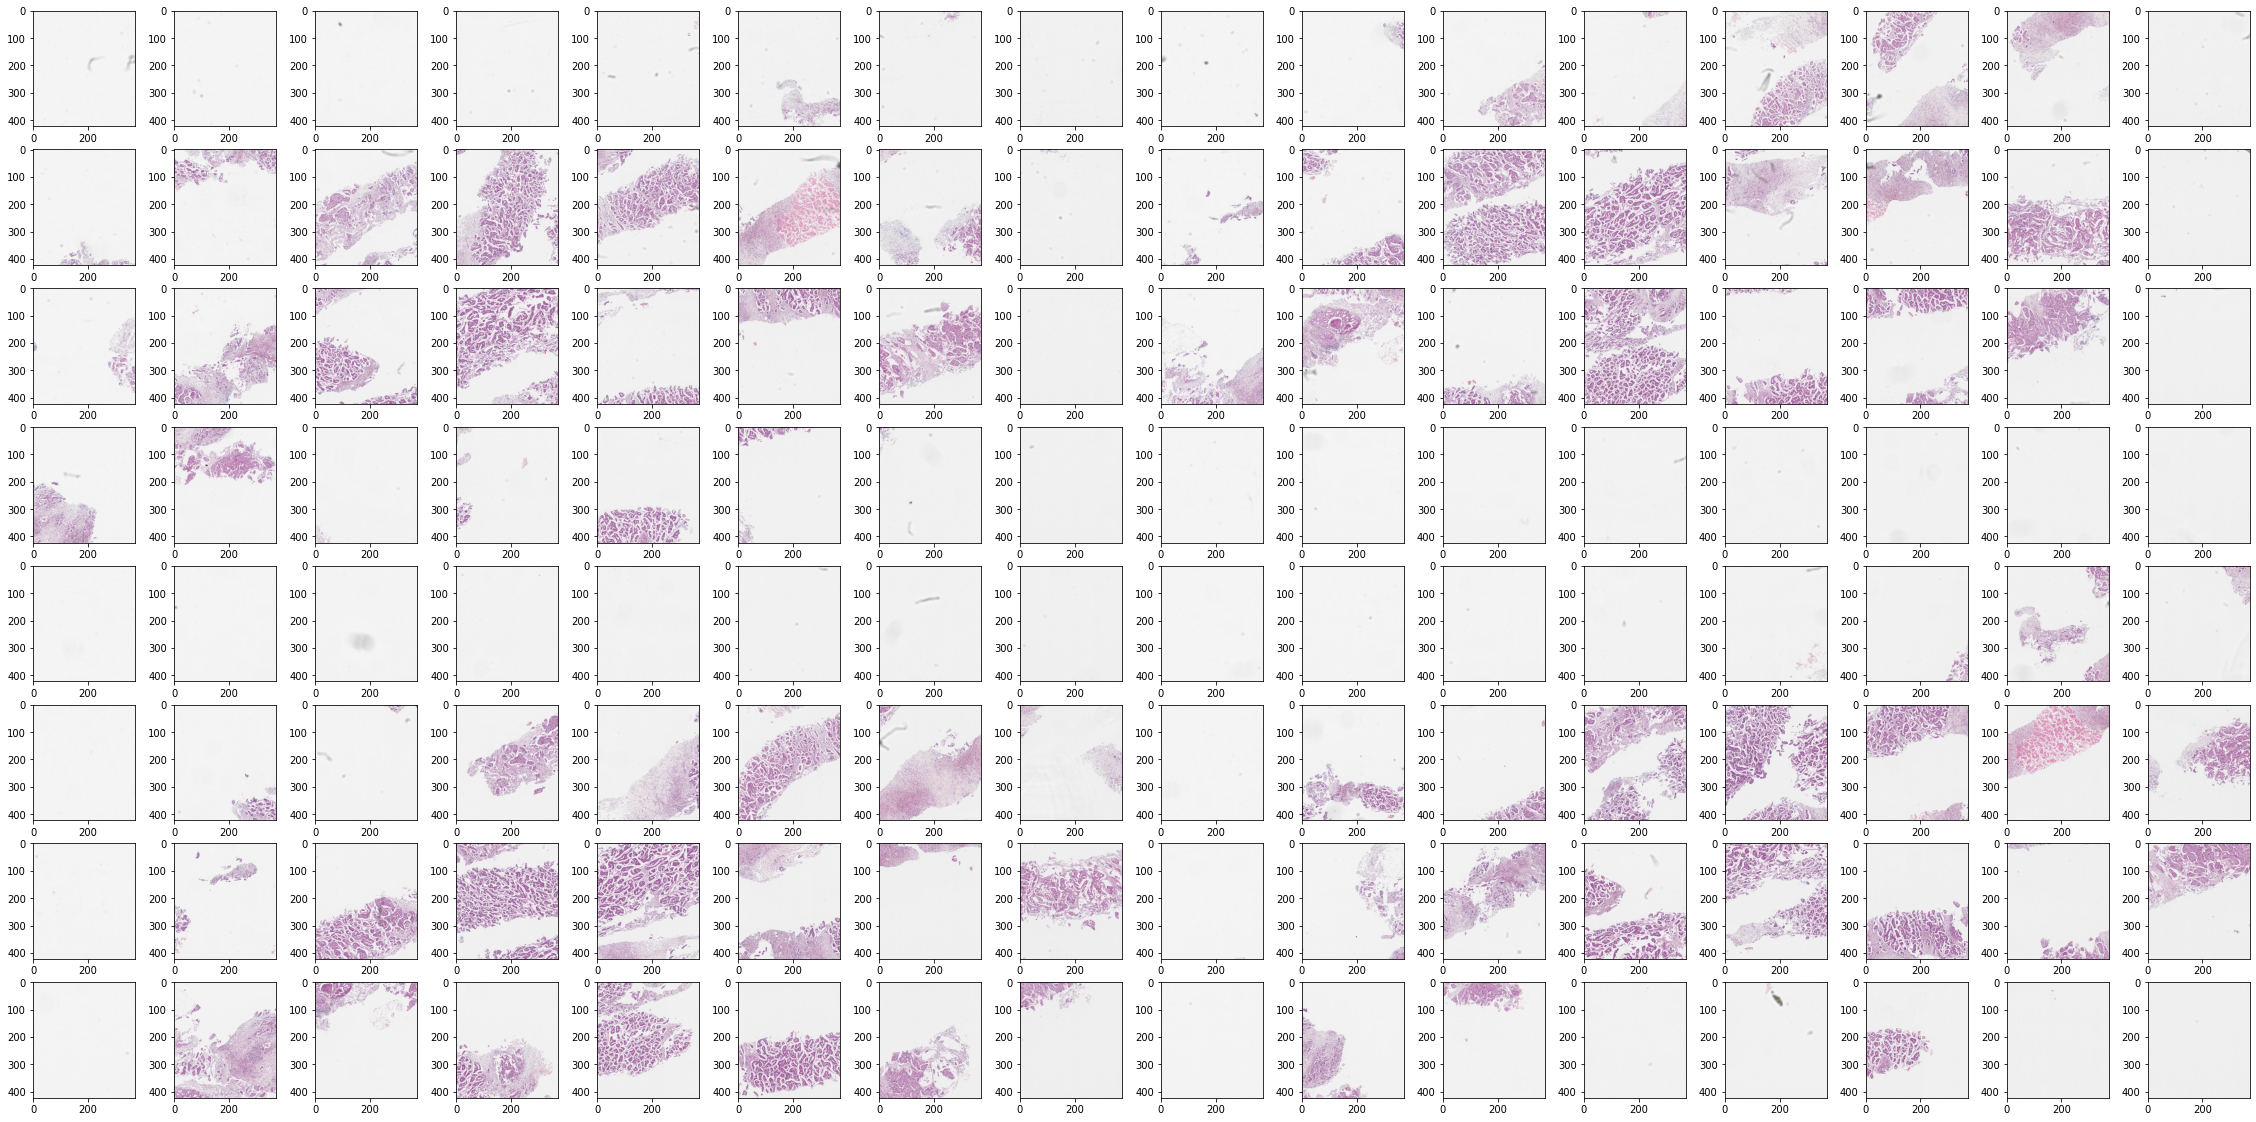

In [34]:
w_ratio = int(w_img_w / 16)
h_ratio = int(w_img_h / 8)
img_stack = []
for w in range(16) :
    for h in range(8) :
        img_stack.append(w_img[h * h_ratio : (h+1) * h_ratio, w * w_ratio : (w+1) * w_ratio])

f, axs = plt.subplots(8, 16, figsize=(40,20))
axs = axs.flatten()

for idx in range(len(img_stack)) :
    axs[idx].imshow(img_stack[idx])
plt.show()

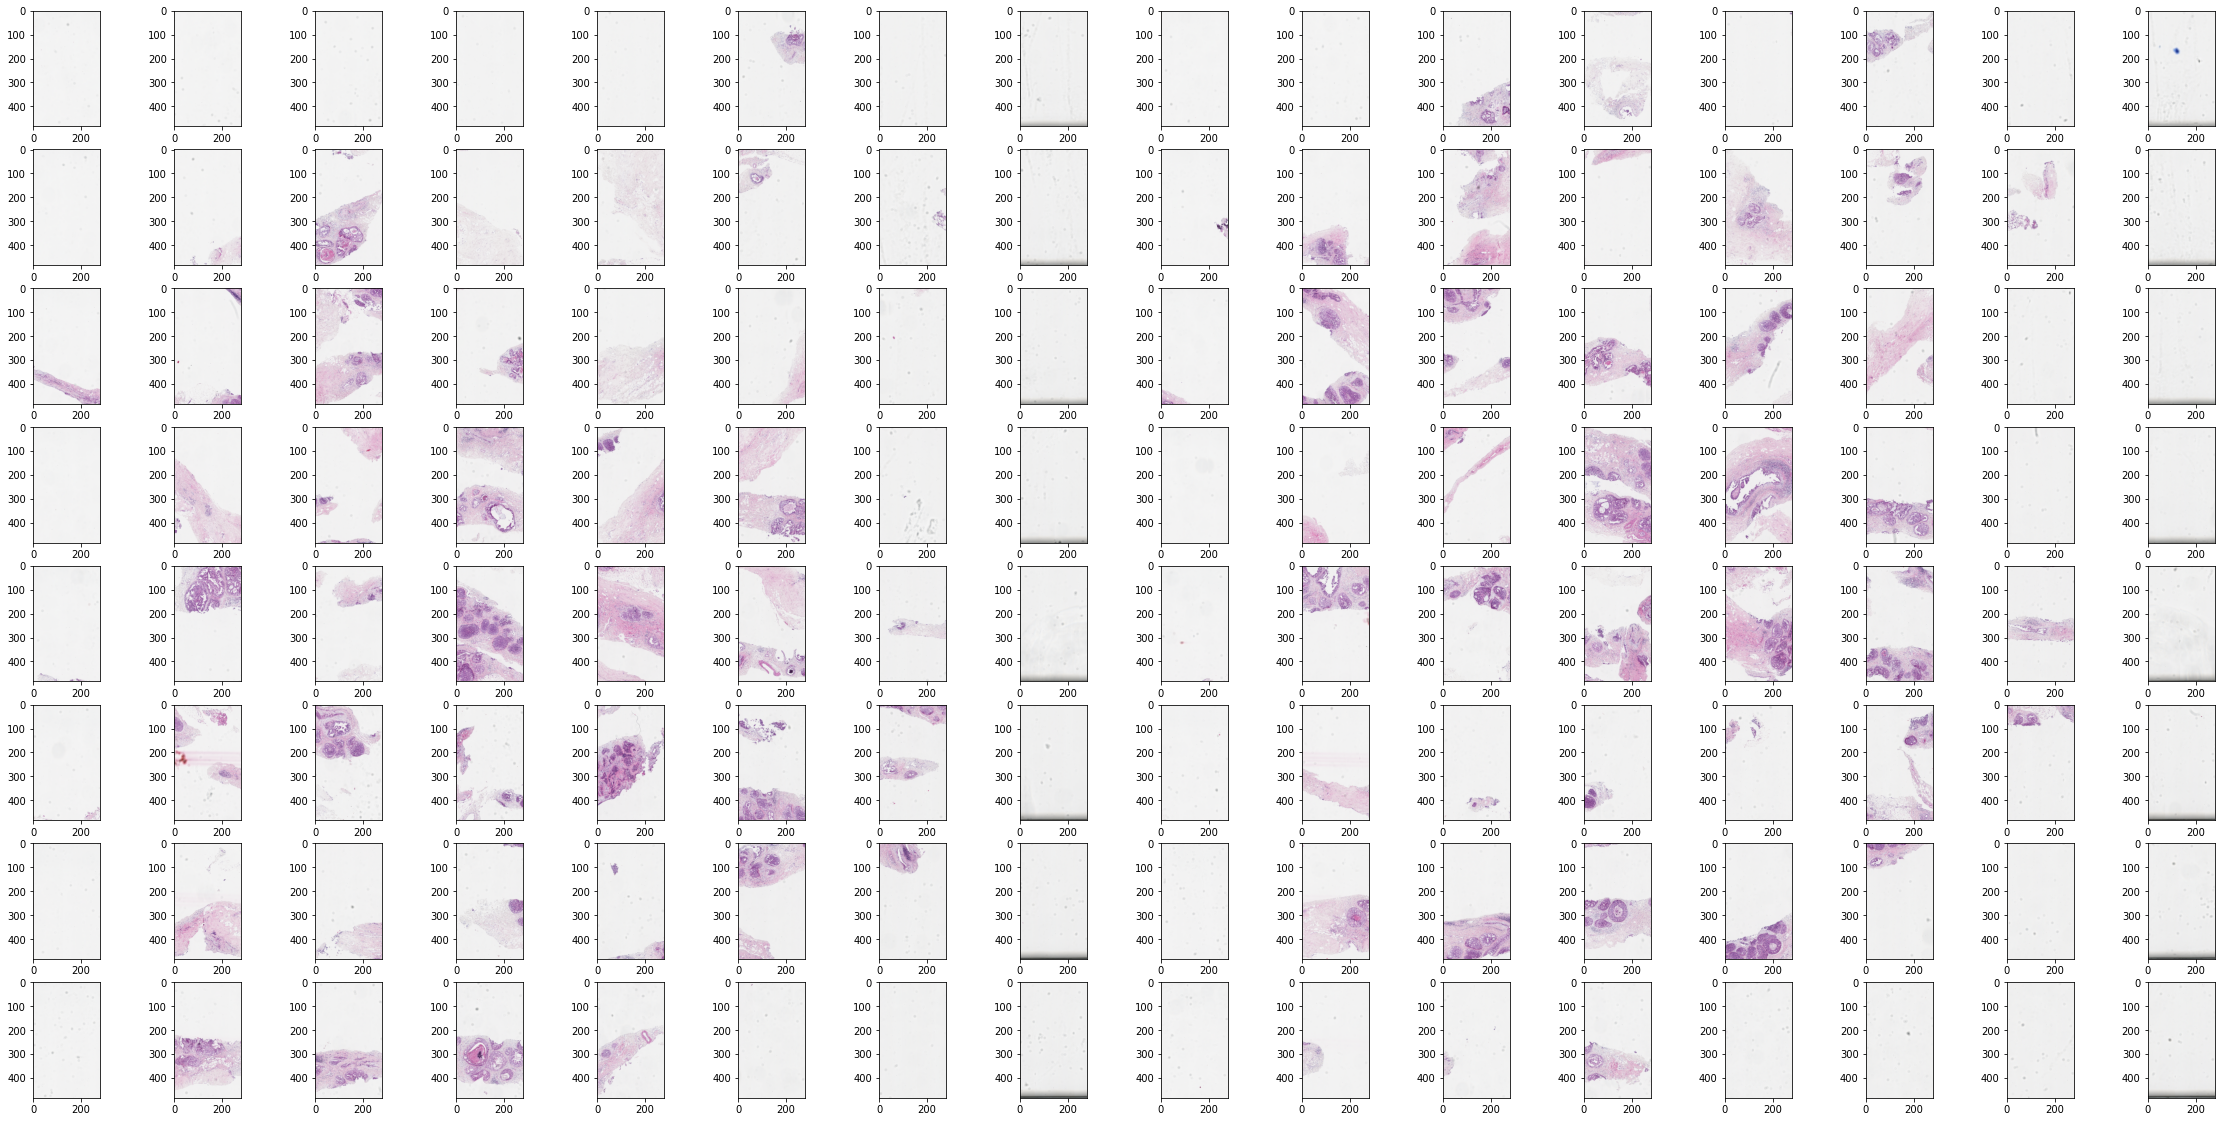

In [35]:
w_ratio = int(h_img_w / 16)
h_ratio = int(h_img_h / 8)
img_stack = []
for w in range(16) :
    for h in range(8) :
        img_stack.append(h_img[h * h_ratio : (h+1) * h_ratio, w * w_ratio : (w+1) * w_ratio])

f, axs = plt.subplots(8, 16, figsize=(40,20))
axs = axs.flatten()

for idx in range(len(img_stack)) :
    axs[idx].imshow(img_stack[idx])
plt.show()

In [73]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

class MyDataset(Dataset):
    def __init__(self):
        self.h_img_path = ['./data/train_imgs/BC_01_0215.png'] * 12
        self.w_img_path = ['./data/train_imgs/BC_01_1207.png'] * 12

    def __len__(self):
        return len(self.h_img_path)

    def __getitem__(self, idx):
        img = cv2.imread(self.h_img_path[idx])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        return img


def collate_fn(batch):
    img_list = []
    img_stack = []
    _transforms = A.Compose([
                            A.Resize(384, 384),
                            A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0, always_apply=False, p=1.0),
                            ])
    
    for img in batch:
        # img 나누기
        w_ratio = int(img.shape[1] / 16)
        h_ratio = int(img.shape[0] / 8)

        for w in range(16) :
            for h in range(8) :
                cropped_img = _transforms(image=img[h * h_ratio : (h+1) * h_ratio, w * w_ratio : (w+1) * w_ratio])['image'].transpose(2,0,1)
                img_stack.append(cropped_img)

    return torch.Tensor(img_stack)


if __name__ == "__main__":
    dataset = MyDataset()

    dataloader = DataLoader(dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)
    for data in dataloader:
        print(type(data))
        print(data.shape)
        break

몇번도니?
(3877, 4481, 3)
h_ratio :  484
w_ratio :  280
<class 'torch.Tensor'>
torch.Size([128, 3, 384, 384])


In [69]:
import timm

In [91]:
timm.list_models(pretrained=True)

['adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'botnet26t_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'convit_base',
 'convit_small',
 'convit_tiny',
 'convmixer_768_32',
 'convmixer_1024_20_ks9_p14',
 'convmixer_1536_20',
 'convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_nano',
 'convnext_small',
 'convnext_small_384_in22ft1k',
 'convnext_small_in22ft1k',
 'convnext_small_in22k',
 'convnext_tiny',
 'convnext_t

In [92]:
m = timm.create_model('efficientnetv2_rw_s', pretrained=True, num_classes=0, global_pool='')


In [93]:
test_data = torch.rand([1,3,384, 384])
test_data.shape

torch.Size([1, 3, 384, 384])

In [94]:
o = m(test_data)
o.shape

torch.Size([1, 1792, 12, 12])

In [95]:
import torch.nn as nn
o = nn.AdaptiveAvgPool2d(1)(o)
print(o.shape)
o = o.flatten(1)
o.shape

torch.Size([1, 1792, 1, 1])


torch.Size([1, 1792])

In [1]:
import torch
a = torch.Tensor([1])
a

tensor([1.])

In [22]:
a = torch.Tensor([0.126, 0.34, 0.53, 0.78, 0.45])


In [23]:
a[a > 0.5] = 1
a[a <= 0.5] = 0
a

tensor([0., 0., 1., 1., 0.])

In [14]:
c = a > 2
c[]

tensor([ True, False,  True,  True,  True])

In [24]:
a = [-0.1151, -0.0473, -0.1850,  0.4415,  0.2576, -0.0670,  0.4047,  0.3146,
        -0.0331, -0.0131,  0.0774,  0.1307, -0.0652, -0.2236, -0.0251, -0.2761,
         0.2198, -0.4887, -0.1534, -0.0073,  0.1646, -0.3614, -0.3672,  0.0706,
         0.3963, -0.5452, -0.0674, -0.2179, -0.0389, -0.0896, -0.3210, -0.4246,
        -0.3107, -0.1802, -0.1198,  0.1137,  0.4075, -0.4169, -0.1821, -0.2971,
         0.1925,  0.2046, -0.1059,  0.1497,  0.1140, -0.1828, -0.2895, -0.5979,
         0.2560, -0.5766,  0.2292,  0.1993, -0.3152, -0.4574, -0.2617,  0.1151,
         0.1269, -0.1271, -0.1296, -0.0211,  0.4619, -0.4434, -0.6953, -0.1304,
         0.2481,  0.0581, -0.0577,  0.0523,  0.0929, -0.1197, -0.0047,  0.2600,
        -0.2098,  0.4392,  0.0664,  0.1016,  0.2727, -0.2338, -0.2219, -0.3933,
         0.0874,  0.1666,  0.1265, -0.1267, -0.0068, -0.8119, -0.6530,  0.0948,
         0.2505, -0.3232,  0.1099, -0.2510,  0.4719, -0.3932,  0.1908,  0.0511,
        -0.0423,  0.1325,  0.0453, -0.3168, -0.2407, -0.1936, -0.2051,  0.2295,
         0.2647, -0.1167, -0.5368, -0.0913, -0.2484, -0.2502, -0.3476,  0.0732,
        -0.0550,  0.3879,  0.0249, -0.2929, -0.1016, -0.2676,  0.2617,  0.0982,
        -0.0469,  0.2001, -0.0242,  0.1566, -0.1039, -0.1107, -0.5433,  0.0788]
a

[-0.1151,
 -0.0473,
 -0.185,
 0.4415,
 0.2576,
 -0.067,
 0.4047,
 0.3146,
 -0.0331,
 -0.0131,
 0.0774,
 0.1307,
 -0.0652,
 -0.2236,
 -0.0251,
 -0.2761,
 0.2198,
 -0.4887,
 -0.1534,
 -0.0073,
 0.1646,
 -0.3614,
 -0.3672,
 0.0706,
 0.3963,
 -0.5452,
 -0.0674,
 -0.2179,
 -0.0389,
 -0.0896,
 -0.321,
 -0.4246,
 -0.3107,
 -0.1802,
 -0.1198,
 0.1137,
 0.4075,
 -0.4169,
 -0.1821,
 -0.2971,
 0.1925,
 0.2046,
 -0.1059,
 0.1497,
 0.114,
 -0.1828,
 -0.2895,
 -0.5979,
 0.256,
 -0.5766,
 0.2292,
 0.1993,
 -0.3152,
 -0.4574,
 -0.2617,
 0.1151,
 0.1269,
 -0.1271,
 -0.1296,
 -0.0211,
 0.4619,
 -0.4434,
 -0.6953,
 -0.1304,
 0.2481,
 0.0581,
 -0.0577,
 0.0523,
 0.0929,
 -0.1197,
 -0.0047,
 0.26,
 -0.2098,
 0.4392,
 0.0664,
 0.1016,
 0.2727,
 -0.2338,
 -0.2219,
 -0.3933,
 0.0874,
 0.1666,
 0.1265,
 -0.1267,
 -0.0068,
 -0.8119,
 -0.653,
 0.0948,
 0.2505,
 -0.3232,
 0.1099,
 -0.251,
 0.4719,
 -0.3932,
 0.1908,
 0.0511,
 -0.0423,
 0.1325,
 0.0453,
 -0.3168,
 -0.2407,
 -0.1936,
 -0.2051,
 0.2295,
 0.2647,
 -0

In [28]:
import torch.nn.functional as F
import numpy as np
import torch

F.softmax(torch.Tensor(a), dim=0)

tensor([0.0071, 0.0077, 0.0067, 0.0125, 0.0104, 0.0075, 0.0120, 0.0110, 0.0078,
        0.0079, 0.0087, 0.0091, 0.0075, 0.0064, 0.0078, 0.0061, 0.0100, 0.0049,
        0.0069, 0.0080, 0.0095, 0.0056, 0.0056, 0.0086, 0.0119, 0.0046, 0.0075,
        0.0065, 0.0077, 0.0073, 0.0058, 0.0052, 0.0059, 0.0067, 0.0071, 0.0090,
        0.0121, 0.0053, 0.0067, 0.0060, 0.0097, 0.0098, 0.0072, 0.0093, 0.0090,
        0.0067, 0.0060, 0.0044, 0.0104, 0.0045, 0.0101, 0.0098, 0.0059, 0.0051,
        0.0062, 0.0090, 0.0091, 0.0071, 0.0070, 0.0079, 0.0127, 0.0051, 0.0040,
        0.0070, 0.0103, 0.0085, 0.0076, 0.0085, 0.0088, 0.0071, 0.0080, 0.0104,
        0.0065, 0.0124, 0.0086, 0.0089, 0.0105, 0.0063, 0.0064, 0.0054, 0.0088,
        0.0095, 0.0091, 0.0071, 0.0080, 0.0036, 0.0042, 0.0088, 0.0103, 0.0058,
        0.0090, 0.0062, 0.0129, 0.0054, 0.0097, 0.0084, 0.0077, 0.0092, 0.0084,
        0.0058, 0.0063, 0.0066, 0.0065, 0.0101, 0.0105, 0.0071, 0.0047, 0.0073,
        0.0063, 0.0062, 0.0057, 0.0086, 

In [36]:
F.softmax(torch.Tensor([0.1, 0.2]), dim=-1)

tensor([0.4750, 0.5250])

In [60]:
b = F.sigmoid(torch.Tensor([ 0.1564, -0.2196,  0.1092, -0.3103, -0.0642, -0.2309, -0.0538, -0.2475,
         0.3812, -0.0433,  0.2126,  0.0309, -0.1142, -0.2206, -0.0561,  0.2946,
        -0.2522, -0.2805, -0.1369,  0.2181, -0.1921, -0.0329, -0.3843, -0.1754,
        -0.1661,  0.3238, -0.0960,  0.1766, -0.2069, -0.1947, -0.0804, -0.1833,
        -0.1081, -0.5500, -0.3490, -0.6735,  0.1196, -0.1656, -0.6085, -0.7072,
        -0.2330, -0.1358,  0.0069, -0.3077, -0.3384, -0.1239, -0.2968,  0.3657,
        -0.6004, -0.4644, -0.5622, -0.7999, -0.3071, -0.1348, -0.5134, -0.5596,
        -0.5806, -0.5974,  0.0647, -0.6283, -0.6887, -0.1824, -0.5794,  0.0125,
        -0.5444, -0.6445, -0.5816, -0.7629, -0.6472, -0.4050, -0.4785,  0.0432,
        -0.5421, -0.2795, -0.1556, -0.4272, -0.6445, -0.3874, -0.3636, -0.2060,
         0.0417, -0.7636, -0.3217, -1.0475, -0.2724,  0.2445, -0.3957, -0.4571,
        -0.6411, -0.5936,  0.0016, -0.0244, -0.7246, -0.6909, -0.5463,  0.2273,
         0.1506, -0.5923, -0.0768, -0.2644,  0.0203,  0.2460,  0.1638, -0.4802,
        -0.6685, -0.0053, -0.0285, -0.1847, -0.7885, -0.0239, -0.4159, -0.2158,
         0.3692, -0.9771, -0.1048, -0.0908,  0.3901,  0.1659,  0.0048, -0.0464,
        -0.0955, -0.4230,  0.6120,  0.1051, -0.4011, -0.2373,  0.1866,  0.3016]))

In [61]:
b

tensor([0.5390, 0.4453, 0.5273, 0.4230, 0.4840, 0.4425, 0.4866, 0.4384, 0.5942,
        0.4892, 0.5530, 0.5077, 0.4715, 0.4451, 0.4860, 0.5731, 0.4373, 0.4303,
        0.4658, 0.5543, 0.4521, 0.4918, 0.4051, 0.4563, 0.4586, 0.5803, 0.4760,
        0.5440, 0.4485, 0.4515, 0.4799, 0.4543, 0.4730, 0.3659, 0.4136, 0.3377,
        0.5299, 0.4587, 0.3524, 0.3302, 0.4420, 0.4661, 0.5017, 0.4237, 0.4162,
        0.4691, 0.4263, 0.5904, 0.3543, 0.3859, 0.3630, 0.3100, 0.4238, 0.4664,
        0.3744, 0.3636, 0.3588, 0.3549, 0.5162, 0.3479, 0.3343, 0.4545, 0.3591,
        0.5031, 0.3672, 0.3442, 0.3586, 0.3180, 0.3436, 0.4001, 0.3826, 0.5108,
        0.3677, 0.4306, 0.4612, 0.3948, 0.3442, 0.4043, 0.4101, 0.4487, 0.5104,
        0.3179, 0.4203, 0.2597, 0.4323, 0.5608, 0.4023, 0.3877, 0.3450, 0.3558,
        0.5004, 0.4939, 0.3264, 0.3338, 0.3667, 0.5566, 0.5376, 0.3561, 0.4808,
        0.4343, 0.5051, 0.5612, 0.5409, 0.3822, 0.3388, 0.4987, 0.4929, 0.4540,
        0.3125, 0.4940, 0.3975, 0.4463, 

In [62]:
b[b > 0.5] = 1
b[b <= 0.5] = 0
b

tensor([1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
        1., 1.])

In [63]:
c = torch.tensor([1] * len(b))

In [67]:
from sklearn.metrics import accuracy_score, f1_score

f1_score(c, b, average='macro')

0.1949685534591195

In [43]:
def softmax(x):
    
    f_x = np.exp(x) / np.sum(np.exp(x))
    return f_x

softmax([0.7, 0.9])

array([0.450166, 0.549834])

In [51]:
abs(-0.1)

0.1